# quicfire-tools Package

In [26]:
from quicfire_tools import SimulationInputs, SimulationOutputs

In [27]:
import matplotlib.pyplot as plt

# Inputs Module

In [28]:
# Creating an object representing a complete QUIC-Fire simulation requires just a few inputs
simple_simulation = SimulationInputs.create_simulation(
    nx=100, ny=100, fire_nz=1, wind_speed=2.75, wind_direction=270, simulation_time=600
)

In [29]:
# One line of user facing code writes the entirety of a QUIC-Fire input file deck to a directory
simple_simulation.write_inputs("simulation")

In [30]:
# Individual objects representing each input file can be accessed from the simulation
simple_simulation.quic_fire

QUIC_fire(name='QUIC_fire', fire_flag=1, random_seed=-1, time_now=1705940333, sim_time=600, fire_time_step=1, quic_time_step=1, out_time_fire=30, out_time_wind=30, out_time_emis_rad=30, out_time_wind_avg=30, nz=1, stretch_grid_flag=0, dz=1, dz_array=[], fuel_density_flag=1, fuel_density=0.5, fuel_moisture_flag=1, fuel_moisture=0.1, fuel_height_flag=1, fuel_height=1.0, size_scale_flag=0, size_scale=0.0005, patch_and_gap_flag=0, patch_size=0, gap_size=0, ignition=RectangleIgnition(ignition_flag=<IgnitionSources.rectangle: 1>, x_min=20.0, y_min=20.0, x_length=10.0, y_length=160.0), ignitions_per_cell=2, firebrand_flag=0, auto_kill=1, eng_to_atm_out=0, react_rate_out=0, fuel_dens_out=1, qf_wind_out=0, qu_wind_inst_out=1, qu_wind_avg_out=0, fuel_moist_out=0, mass_burnt_out=0, firebrand_out=0, emissions_out=0, radiation_out=0, surf_eng_out=0)

Don't remember what any of these attributes mean? Neither do we! Look at the reference documentation for a description of each input.

https://silvxlabs.github.io/quicfire-tools/reference/#quicfire_tools.inputs.QUIC_fire



In [31]:
# Inputs can be updated for each input file
print(f"Old simulation time: {simple_simulation.quic_fire.sim_time}")
simple_simulation.quic_fire.sim_time = 1200
print(f"New simulation time: {simple_simulation.quic_fire.sim_time}")

Old simulation time: 600
New simulation time: 1200


In [32]:
# Can handle data type casting for easy conversion
simple_simulation.quic_fire.sim_time = "999"
print(f"Casted simulation time: {simple_simulation.quic_fire.sim_time}")

Casted simulation time: 999


In [33]:
# Set methods are provided off of the SimulationInputs object to quickly change frequently accessed inputs
simple_simulation.set_output_files(eng_to_atm=True, fuel_dens=True, mass_burnt=True)

In [34]:
# Convert input files and entire simulations to common Python data types
quic_fire_dict = simple_simulation.quic_fire.to_dict()
simulation_dict = simple_simulation.to_dict()

In [35]:
# Write an entire simulation to a JSON representation for version control.
# Can share an entire QUIC-Fire simulation with one file.
simple_simulation.to_json("simulation/simulation.json")

In [36]:
# Read in a new SimulationInputs object from a JSON file
new_simulation = SimulationInputs.from_json("simulation/simulation.json")

In [37]:
# Don't have a JSON file for a simulation?
# Read in the simulation from the input files in a directory.
new_simulation_from_dir = SimulationInputs.from_directory("simulation")

sensor1 !Site Name

0 !Upper level flag (1 = use this profile for upper level winds)

50 !Upper level height (meters)

1 !Site Coordinate Flag (1=QUIC, 2=UTM, 3=Lat/Lon)

1 !X coordinate (meters)

1 !Y coordinate (meters)

1705940333 !Begining of time step in Unix Epoch time

1 !site boundary layer flag (1 = log, 2 = exp, 3 = urban canopy, 4 = discrete data points)

0.1 !site zo

0. ! 1/L (default = 0)

!Height (m), Speed (m/s), Direction (deg relative to true N)

6.1 2.75 270


## Create a simulation with .dat files

In [38]:
# Start out creating a simulation with the minimum viable set of data
custom_simple_simulation = SimulationInputs.create_simulation(
    nx=200, ny=200, fire_nz=50, wind_speed=2.75, wind_direction=270, simulation_time=600
)

In [39]:
# Set all fuel, ignition, and topography flags to read from .dat files
custom_simple_simulation.set_custom_simulation()

In [40]:
# Write the simulation input deck to a directory
custom_simple_simulation.write_inputs("simulation")

### What if we want all .dat file inputs, except for topography, which we want as uniform?

In [41]:
custom_simulation_flat_topo = SimulationInputs.create_simulation(
    nx=200, ny=200, fire_nz=50, wind_speed=2.75, wind_direction=270, simulation_time=600
)
custom_simulation_flat_topo.set_custom_simulation(topo=False)

In [42]:
custom_simulation_flat_topo.qu_topoinputs.topography

TopoType(topo_flag=<TopoFlags.flat: 0>)

### What if there's something I don't know how to do?

Check out our full documentation with tutorials, how to guides, and explanations.

https://silvxlabs.github.io/quicfire-tools/

# Outputs Module

In [43]:
# Create an outputs object with the minimum amount of information needed.
outputs = SimulationOutputs("example-linefire-output/Output", nz=1, ny=200, nx=200)

In [44]:
# Look at what outputs are available for the simulation. NOT which outputs are in the QUIC_fire.inp file
# But which outputs are actually present
outputs.list_available_outputs()

['fuels-dens', 'groundfuelheight', 'mburnt_integ']

In [45]:
# Get fuels-dens as a numpy array.
fuels_dens_np = outputs.to_numpy("fuels-dens")

In [46]:
# All output arrays are 4D with dimensions: time, z, y, x
print(fuels_dens_np.shape)

(7, 2, 200, 200)


In [47]:
# Everything at once? That could be more data than what I can fit into memory.
# Can specify a single timestep or a range of timesteps to limit the amount of data in memory.
fuels_dens_np = outputs.to_numpy("fuels-dens", timestep=5)
print(fuels_dens_np.shape)

(1, 2, 200, 200)


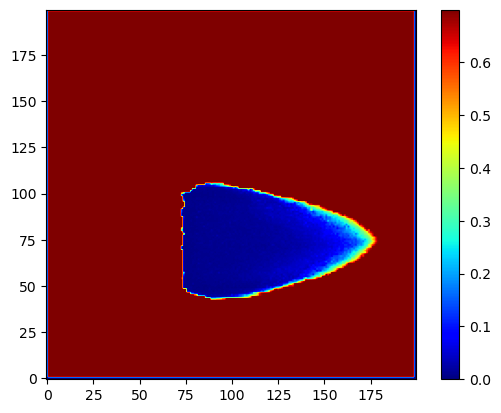

In [48]:
# Look at the data as an image plot. No need to copy/paste 8 drawfire files.
plt.imshow(fuels_dens_np[0, 0, ...], origin="lower", cmap="jet")
plt.colorbar()
plt.show()

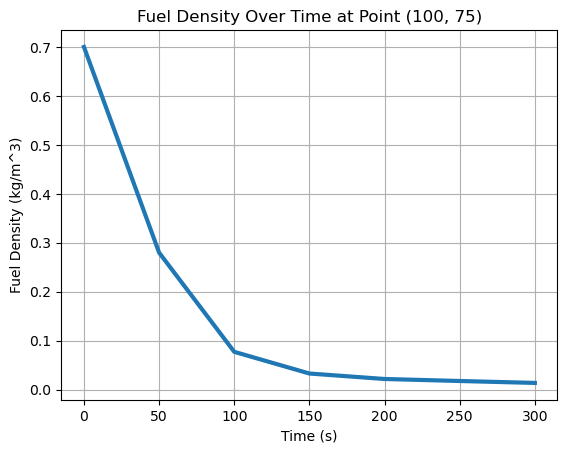

In [49]:
# Look at fuel density over time for point (100, 75)
fuels_dens = outputs.get_output("fuels-dens")
fuels_dens_np = fuels_dens.to_numpy()
plt.plot(fuels_dens.times, fuels_dens_np[:, 0, 75, 100], lw=3)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Fuel Density (kg/m^3)")
plt.title("Fuel Density Over Time at Point (100, 75)")
plt.show()

In [50]:
# Can also get the data as a dask array or zarr array
fuels_dens_da = outputs.to_dask("fuels-dens")
zarr_array = outputs.to_zarr("simulation/zarray")

A dataset for fuels-dens already exists in the zarr file.
 Set over_write flag to True if you would like to rebuild the zarr.
A dataset for groundfuelheight already exists in the zarr file.
 Set over_write flag to True if you would like to rebuild the zarr.
A dataset for mburnt_integ already exists in the zarr file.
 Set over_write flag to True if you would like to rebuild the zarr.
